In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import oggm

https://cluster.klima.uni-bremen.de/~fmaussion/runs/gmip3/

https://cluster.klima.uni-bremen.de/~fmaussion/runs/gmip3/output/RGI01/gfdl-esm4_historical_1851-1870.nc

In [2]:
out_path = '/home/www/lschuster/glacierMIP3_analysis/glacierMIP3_5models_all_rgi_regions_sum.nc'

ds_reg_models = xr.open_dataset(out_path)
out_path_oggm = '/home/www/lschuster/glacierMIP3_analysis/glacierMIP3_oggm_models_all_rgi_regions_sum.nc'
ds_reg_models_oggm_versions = xr.open_dataset(out_path_oggm)
ds_reg_models = xr.concat([ds_reg_models, ds_reg_models_oggm_versions], dim='model_author')

ds_reg_models = ds_reg_models.sel(model_author=['Rounce','Huss','Compagno', 'Kraaijenbrink',
       'GLIMB', 'OGGM', 'OGGM-VAS'])


In [3]:
xr.open_dataset('/home/www//fmaussion/runs/gmip3/output/RGI11/gfdl-esm4_historical_1901-1920.nc').sum(dim='rgi_id')

<xarray.Dataset>
Dimensions:         (time: 5001)
Coordinates:
  * time            (time) float64 0.0 1.0 2.0 3.0 ... 4.998e+03 4.999e+03 5e+03
    hydro_year      (time) int64 ...
    hydro_month     (time) int64 ...
    calendar_year   (time) int64 ...
    calendar_month  (time) int64 ...
Data variables:
    volume          (time) float32 1.279e+11 1.252e+11 ... 6.032e+10 5.9e+10
    volume_bsl      (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    area            (time) float32 2.091e+09 2.077e+09 ... 1.234e+09 1.215e+09
    length          (time) float32 2.842e+06 2.987e+06 ... 1.436e+06 1.36e+06
    water_level     float32 0.0
    glen_a          float32 1.815e-20
    fs              float32 0.0

In [4]:
xr.open_dataset('/home/www//fmaussion/runs/gmip3/output/RGI11/gfdl-esm4_historical_1851-1870.nc').sum(dim='rgi_id')

<xarray.Dataset>
Dimensions:         (time: 5001)
Coordinates:
  * time            (time) float64 0.0 1.0 2.0 3.0 ... 4.998e+03 4.999e+03 5e+03
    hydro_year      (time) int64 ...
    hydro_month     (time) int64 ...
    calendar_year   (time) int64 ...
    calendar_month  (time) int64 ...
Data variables:
    volume          (time) float32 1.279e+11 1.265e+11 ... 6.205e+10 6.179e+10
    volume_bsl      (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    area            (time) float32 2.091e+09 2.081e+09 ... 1.396e+09 1.3e+09
    length          (time) float32 2.842e+06 2.989e+06 ... 1.927e+06 1.585e+06
    water_level     float32 0.0
    glen_a          float32 1.815e-20
    fs              float32 0.0

In [5]:
xr.open_dataset('/home/www/lschuster/glacierMIP3_analysis/OGGM/regional_filled/11/OGGM_rgi11_sum_1851-1870_gfdl-esm4_historical_filled.nc').volume_m3

<xarray.DataArray 'volume_m3' (simulation_year: 5001)>
array([1.279262e+11, 1.265252e+11, 1.246475e+11, ..., 6.147637e+10,
       6.206461e+10, 6.180547e+10])
Coordinates:
    time            (simulation_year) float64 ...
    hydro_year      (simulation_year) int64 ...
    hydro_month     (simulation_year) int64 ...
    calendar_year   (simulation_year) int64 ...
    calendar_month  (simulation_year) int64 ...
Dimensions without coordinates: simulation_year
Attributes:
    description:  Total glacier volume
    unit:         m 3

In [23]:
d_reg_num_name={}
d_reg_num_name['01'] = 'Alaska'
d_reg_num_name['02'] = 'Western Canada & USA'
d_reg_num_name['03'] = 'Arctic Canada North'
d_reg_num_name['04'] = 'Arctic Canada South'
d_reg_num_name['05'] = 'Greenland'
d_reg_num_name['06'] = 'Iceland'
d_reg_num_name['07'] = 'Svalbard and Jan Mayen'
d_reg_num_name['08'] = 'Scandinavia'
d_reg_num_name['09'] = 'Russian Arctic'
d_reg_num_name['10'] = 'North Asia'
d_reg_num_name['11'] = 'Central Europe'
d_reg_num_name['12'] = 'Caucasus and Middle East'
d_reg_num_name['13'] = 'Central Asia'
d_reg_num_name['14'] = 'South Asia West'
d_reg_num_name['15'] = 'South Asia East'
d_reg_num_name['16'] = 'Low Latitudes'
d_reg_num_name['17'] = 'Southern Andes'
d_reg_num_name['18'] = 'New Zealand'
d_reg_num_name['19'] = 'Antarctic and Subantarctic'
rgi_reg = '11'
ds_reg_models_sel = ds_reg_models.sel(rgi_reg=rgi_reg).isel(gcm=0).sel(ssp=['hist', 'ssp126','ssp585'])

In [53]:
rgi_reg = '11'
ds_reg_models_sel = ds_reg_models.sel(rgi_reg=rgi_reg).isel(gcm=0).sel(ssp=['hist', 'ssp126','ssp585'])
plt.rcParams.update({'font.size': 24})
ssp_colors = ['darkgrey', 'deepskyblue', 'orange', 'red']
#for rgi_reg in ds_reg_models_11_sel.rgi_reg.values[:-1]:

fig, axs = plt.subplots(1,7,figsize=(32,10), sharey=True)
for j, model_author in enumerate(ds_reg_models_sel.model_author.values):
#for j, rgi_reg in enumerate(ds_reg_models.rgi_reg.values[:-1]):
    ax = axs[j]
    for period in ds_reg_models_sel.period:
        for c, ssp in zip(ssp_colors,ds_reg_models.ssp):
            try:
                ax.plot(ds_reg_models_sel.sel(model_author=model_author).simulation_year,
                     ds_reg_models_sel.sel(model_author=model_author, ssp=ssp, period=period).volume_m3/1e9, 
                         ls='-', color=c, label=ssp.values)
                ax.set_xlabel('simulation year')

            except:
                #print(period)
                pass
        #ax.legend()
    if j==0:
        ax.set_ylabel('volume (km3)')

    ax.set_title(f'{model_author}')
    ax.set_xlim([0,1000])
plt.suptitle(f'RGI region: {rgi_reg}, only gcm: gfdl...')
plt.tight_layout()
#plt.savefig(f'/home/www/lschuster/glacierMIP3_analysis/volume_evolution_regional_{rgi_reg}.png')

In [55]:
ds_reg_models_ref_period

<xarray.Dataset>
Dimensions:          (model_author: 7, simulation_year: 5001)
Coordinates:
  * model_author     (model_author) object 'Rounce' 'Huss' ... 'OGGM' 'OGGM-VAS'
  * simulation_year  (simulation_year) int16 0 1 2 3 4 ... 4997 4998 4999 5000
    period           <U9 '1995-2014'
    gcm              <U9 'gfdl-esm4'
    ssp              <U4 'hist'
    rgi_reg          <U2 '11'
Data variables:
    volume_m3        (model_author, simulation_year) float32 1.294e+11 ... 1e+11
    area_m2          (model_author, simulation_year) float32 2.092e+09 ... 1....
Attributes:
    contributor:        Rounce
    contributor_email:  drounce@cmu.edu
    creation_date:      15/02/2022
    rgi-region:         rgi01
    aggregation-level:  glaciers
    period:             1851-1870
    gcm:                gfdl-esm4
    ssp:                hist
    information:        PyGEM for mass balance and calibration with OGGM for ...
    stop_criterion:     Simulations were stopped if volume was 0 for 20 years...

In [7]:
t = sns.color_palette('colorblind')
t[:-1]

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2)]

In [24]:
# color blind seaborn palette, but want the two Rounce types w. similar color
pal_models = [#(0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
               (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
               (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
             (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
             (0.8352941176470589, 0.3686274509803922, 0.0),
            #(0.9254901960784314, 0.8823529411764706, 0.2),
              (0.8, 0.47058823529411764, 0.7372549019607844),
              (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
             (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]
pal_models = sns.color_palette(pal_models)
hue_order = ['Rounce', 'Huss','Compagno', 'Kraaijenbrink',
       'GLIMB', 'OGGM-VAS', 'OGGM']

In [120]:
pal_models

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]

In [121]:
ds_reg_models_ref_period

<xarray.Dataset>
Dimensions:          (model_author: 7, simulation_year: 5001)
Coordinates:
  * model_author     (model_author) object 'Rounce' 'Huss' ... 'OGGM' 'OGGM-VAS'
  * simulation_year  (simulation_year) int16 0 1 2 3 4 ... 4997 4998 4999 5000
    period           <U9 '2081-2100'
    gcm              <U9 'gfdl-esm4'
    ssp              <U6 'ssp585'
    rgi_reg          <U2 '11'
Data variables:
    volume_m3        (model_author, simulation_year) float32 1.375e+11 ... 3....
    area_m2          (model_author, simulation_year) float32 2.092e+09 ... 3....
Attributes:
    contributor:        Rounce
    contributor_email:  drounce@cmu.edu
    creation_date:      15/02/2022
    rgi-region:         rgi01
    aggregation-level:  glaciers
    period:             1851-1870
    gcm:                gfdl-esm4
    ssp:                hist
    information:        PyGEM for mass balance and calibration with OGGM for ...
    stop_criterion:     Simulations were stopped if volume was 0 for 20 years...

In [11]:
ds_reg_models_ref_period

<xarray.Dataset>
Dimensions:          (model_author: 7, simulation_year: 5001)
Coordinates:
  * model_author     (model_author) object 'Rounce' 'Huss' ... 'OGGM' 'OGGM-VAS'
  * simulation_year  (simulation_year) int16 0 1 2 3 4 ... 4997 4998 4999 5000
    period           <U9 '1995-2014'
    gcm              <U9 'gfdl-esm4'
    ssp              <U4 'hist'
    rgi_reg          <U2 '11'
Data variables:
    volume_m3        (model_author, simulation_year) float32 1.294e+11 ... 1e+11
    area_m2          (model_author, simulation_year) float32 2.092e+09 ... 1....
Attributes:
    contributor:        Rounce
    contributor_email:  drounce@cmu.edu
    creation_date:      15/02/2022
    rgi-region:         rgi01
    aggregation-level:  glaciers
    period:             1851-1870
    gcm:                gfdl-esm4
    ssp:                hist
    information:        PyGEM for mass balance and calibration with OGGM for ...
    stop_criterion:     Simulations were stopped if volume was 0 for 20 years...

just for one gcm

In [ ]:
plt.rcParams.update({'font.size': 24})
#for rgi_reg in ds_reg_models_11_sel.rgi_reg.values[:-1]:
period = '1995-2014'
ssp = 'hist'
ds_reg_models_ref_period = ds_reg_models_sel.sel(period=period).sel(ssp=ssp)
#ds_reg_models_ref_period = ds_reg_models_ref_period.dropna(dim='model_author')
plt.figure(figsize=(24,10))
ax = plt.gca()

for j, model_author in enumerate(hue_order):
#for j, rgi_reg in enumerate(ds_reg_models.rgi_reg.values[:-1]):
    try:
        ax.plot(ds_reg_models_ref_period.sel(model_author=model_author).simulation_year,
             ds_reg_models_ref_period.sel(model_author=model_author).volume_m3/1e9, 
                 ls='-', color=pal_models[j],lw=5, label=f'model {j+1}' ###model_author
               )
        ax.set_xlabel('simulation year')

    except:
        #print(period)
        pass
    #ax.legend()
    if j==0:
        ax.set_ylabel(r'volume (km$^3$)')

    #ax.set_title(f'{model_author}')
plt.legend(loc='upper right', ncol=2)
ax2 = ax.twinx()

for j, model_author in enumerate(hue_order):
#for j, rgi_reg in enumerate(ds_reg_models.rgi_reg.values[:-1]):
    try:
        ax2.plot(ds_reg_models_ref_period.sel(model_author=model_author).simulation_year,
             100*ds_reg_models_ref_period.sel(model_author=model_author).volume_m3/ds_reg_models_ref_period.sel(model_author='GLIMB',simulation_year=0).volume_m3, 
                 ls='-', color=pal_models[j],lw=4)#, label=model_author)
    
    except:
        #print(period)
        pass
    #ax.legend()
    if j==0:
        #ax2.set_ylabel('')
        ax2.set_ylabel('relative to initial volume (%)')
plt.suptitle(f'RGI region: {rgi_reg}, only one gcm: , period: {period}, ssp: {ssp}')
plt.xlim([-10,1000])
plt.grid()
plt.tight_layout()
plt.savefig(f'/home/www/lschuster/glacierMIP3_analysis/volume_evolution_regional_{rgi_reg}_anonymous.png')

for all gcms:

In [27]:
ds_reg_models.sel(model_author=model_author).std(dim='gcm')

<xarray.Dataset>
Dimensions:          (simulation_year: 5001)
Coordinates:
    model_author     <U4 'OGGM'
  * simulation_year  (simulation_year) int16 0 1 2 3 4 ... 4997 4998 4999 5000
    period           <U9 '1995-2014'
    ssp              <U4 'hist'
    rgi_reg          <U2 '11'
Data variables:
    volume_m3        (simulation_year) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    area_m2          (simulation_year) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

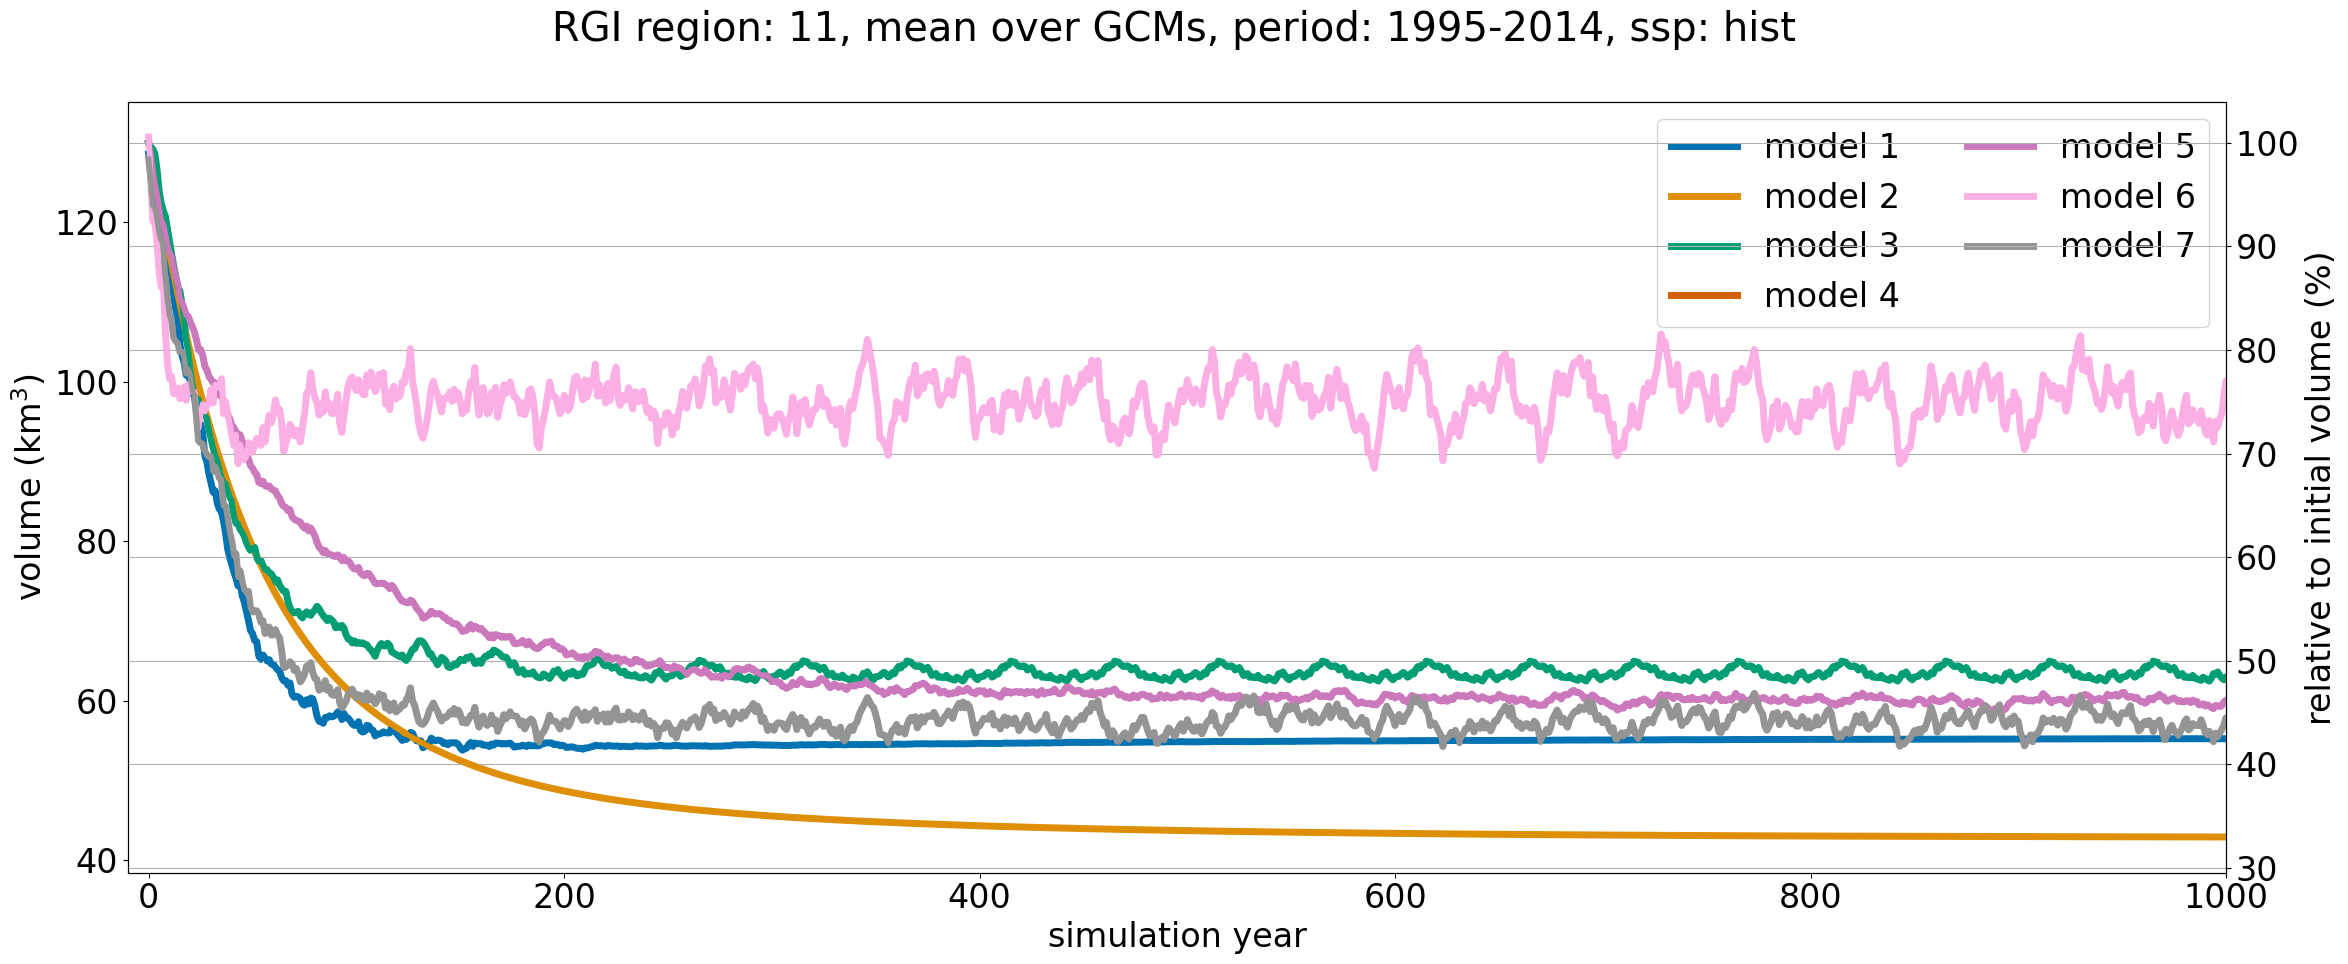

In [25]:
#### OK: that does not work because I don't have all gcms availabel for OGGM e.g. ....
plt.rcParams.update({'font.size': 24})
#for rgi_reg in ds_reg_models_11_sel.rgi_reg.values[:-1]:
period = '1995-2014'
ssp = 'hist'
ds_reg_models_ref_period = ds_reg_models.sel(period=period).sel(ssp=ssp).sel(rgi_reg=rgi_reg)
#ds_reg_models_ref_period = ds_reg_models_ref_period.dropna(dim='model_author')
plt.figure(figsize=(24,10))
ax = plt.gca()

for j, model_author in enumerate(hue_order):
#for j, rgi_reg in enumerate(ds_reg_models.rgi_reg.values[:-1]):
    try:
        ax.plot(ds_reg_models_ref_period.sel(model_author=model_author).simulation_year,
             ds_reg_models_ref_period.sel(model_author=model_author).mean(dim='gcm').volume_m3/1e9, 
                 ls='-', color=pal_models[j],lw=5, label=f'model {j+1}' ###model_author
               )
        ax.set_xlabel('simulation year')

    except:
        #print(period)
        pass
    #ax.legend()
    if j==0:
        ax.set_ylabel(r'volume (km$^3$)')

    #ax.set_title(f'{model_author}')
plt.legend(loc='upper right', ncol=2)
ax2 = ax.twinx()

for j, model_author in enumerate(hue_order):
#for j, rgi_reg in enumerate(ds_reg_models.rgi_reg.values[:-1]):
    try:
        ax2.plot(ds_reg_models_ref_period.sel(model_author=model_author).simulation_year,
             100*ds_reg_models_ref_period.sel(model_author=model_author).mean(dim='gcm').volume_m3/ds_reg_models_ref_period.sel(model_author='GLIMB',simulation_year=0).mean(dim='gcm').volume_m3, 
                 ls='-', color=pal_models[j],lw=4)#, label=model_author)
    
    except:
        #print(period)
        pass
    #ax.legend()
    if j==0:
        #ax2.set_ylabel('')
        ax2.set_ylabel('relative to initial volume (%)')
plt.suptitle(f'RGI region: {rgi_reg}, mean over GCMs, period: {period}, ssp: {ssp}')
plt.xlim([-10,1000])
plt.grid()
plt.tight_layout()
#plt.savefig(f'/home/www/lschuster/glacierMIP3_analysis/volume_evolution_regional_{rgi_reg}_anonymous_{gcm}.png')

In [108]:
d_reg_num_name={}
d_reg_num_name['01'] = 'Alaska'
d_reg_num_name['02'] = 'Western Canada & USA'
d_reg_num_name['03'] = 'Arctic Canada North'
d_reg_num_name['04'] = 'Arctic Canada South'
d_reg_num_name['05'] = 'Greenland'
d_reg_num_name['06'] = 'Iceland'
d_reg_num_name['07'] = 'Svalbard and Jan Mayen'
d_reg_num_name['08'] = 'Scandinavia'
d_reg_num_name['09'] = 'Russian Arctic'
d_reg_num_name['10'] = 'North Asia'
d_reg_num_name['11'] = 'Central Europe'
d_reg_num_name['12'] = 'Caucasus and Middle East'
d_reg_num_name['13'] = 'Central Asia'
d_reg_num_name['14'] = 'South Asia West'
d_reg_num_name['15'] = 'South Asia East'
d_reg_num_name['16'] = 'Low Latitudes'
d_reg_num_name['17'] = 'Southern Andes'
d_reg_num_name['18'] = 'New Zealand'
d_reg_num_name['19'] = 'Antarctic and Subantarctic'

In [142]:
ds_reg_models_ref_period.sel(simulation_year=slice(0,100))

<xarray.Dataset>
Dimensions:          (model_author: 7, simulation_year: 101)
Coordinates:
  * model_author     (model_author) object 'Rounce' 'Huss' ... 'OGGM' 'OGGM-VAS'
  * simulation_year  (simulation_year) int16 0 1 2 3 4 5 ... 95 96 97 98 99 100
    period           <U9 '1995-2014'
    gcm              <U9 'gfdl-esm4'
    ssp              <U4 'hist'
    rgi_reg          <U2 '15'
Data variables:
    volume_m3        (model_author, simulation_year) float32 8.629e+11 ... nan
    area_m2          (model_author, simulation_year) float32 1.474e+10 ... nan
Attributes:
    contributor:        Rounce
    contributor_email:  drounce@cmu.edu
    creation_date:      15/02/2022
    rgi-region:         rgi01
    aggregation-level:  glaciers
    period:             1851-1870
    gcm:                gfdl-esm4
    ssp:                hist
    information:        PyGEM for mass balance and calibration with OGGM for ...
    stop_criterion:     Simulations were stopped if volume was 0 for 20 years...

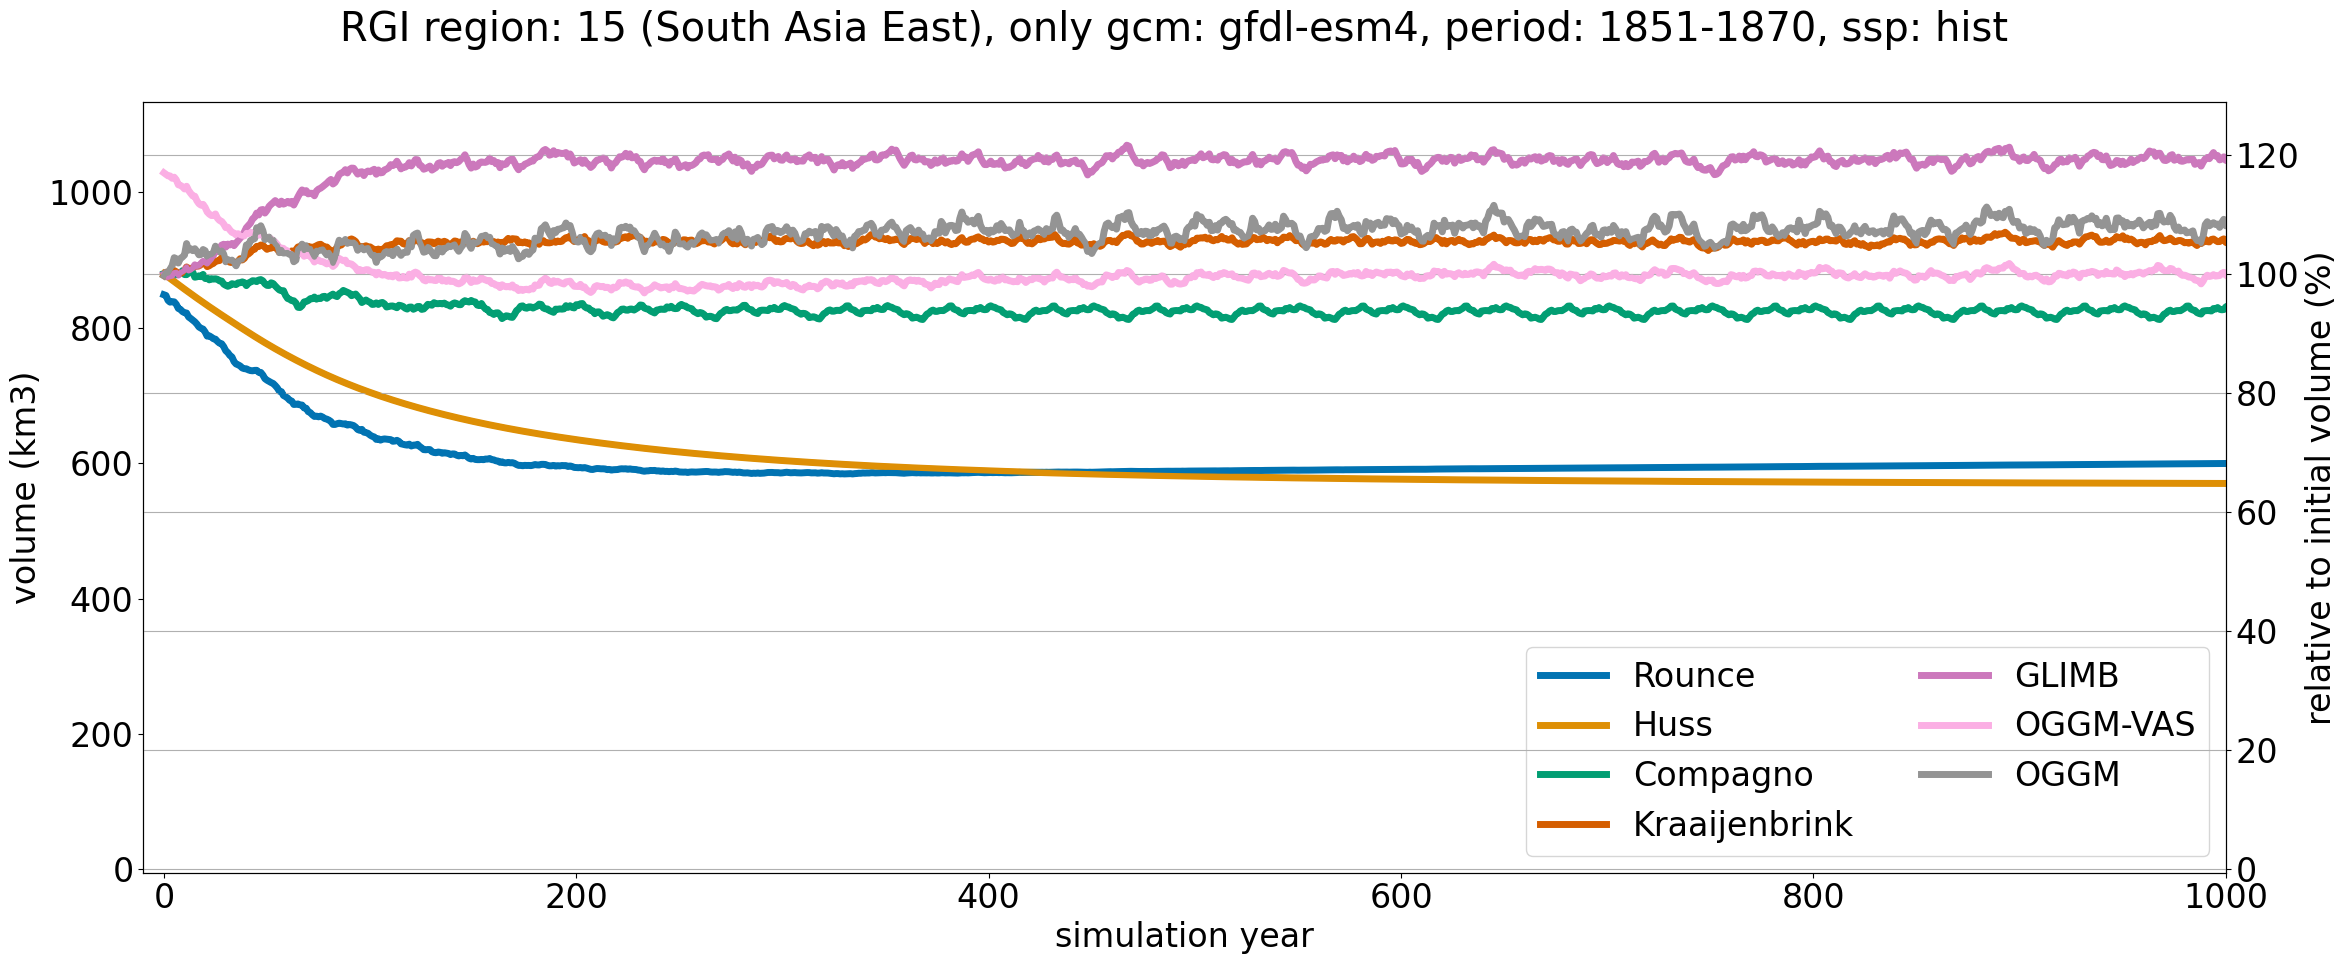

In [160]:
rgi_reg = '15'
ds_reg_models_sel = ds_reg_models.sel(rgi_reg=rgi_reg).isel(gcm=0).sel(ssp=['hist', 'ssp126','ssp585'])

plt.rcParams.update({'font.size': 24})
#for rgi_reg in ds_reg_models_11_sel.rgi_reg.values[:-1]:
period = '1851-1870'
ssp = 'hist'
ds_reg_models_ref_period = ds_reg_models_sel.sel(period=period).sel(ssp=ssp)
#ds_reg_models_ref_period = ds_reg_models_ref_period.dropna(dim='model_author')
maxi = ds_reg_models_sel.volume_m3.max()*1.02/1e9
plt.figure(figsize=(24,10))
ax = plt.gca()

for j, model_author in enumerate(hue_order):
#for j, rgi_reg in enumerate(ds_reg_models.rgi_reg.values[:-1]):
    try:
        ax.plot(ds_reg_models_ref_period.sel(model_author=model_author).simulation_year,
             ds_reg_models_ref_period.sel(model_author=model_author).volume_m3/1e9, 
                 ls='-', color=pal_models[j],lw=5, label=model_author)
        ax.set_xlabel('simulation year')

    except:
        #print(period)
        pass
    #ax.legend()
    if j==0:
        ax.set_ylabel('volume (km3)')

    #ax.set_title(f'{model_author}')
plt.legend(loc='lower right', ncol=2)
ax.set_ylim([-5,maxi])
ax2 = ax.twinx()

for j, model_author in enumerate(hue_order):
#for j, rgi_reg in enumerate(ds_reg_models.rgi_reg.values[:-1]):
    try:
        ax2.plot(ds_reg_models_ref_period.sel(model_author=model_author).simulation_year,
             100*ds_reg_models_ref_period.sel(model_author=model_author).volume_m3/ds_reg_models_ref_period.sel(model_author='GLIMB',simulation_year=0).volume_m3, 
                 ls='-', color=pal_models[j],lw=4)#, label=model_author)
    except:
        #print(period)
        pass
    #ax.legend()
    if j==0:
        #ax2.set_ylabel('')
        ax2.set_ylabel('relative to initial volume (%)')
rel = 100*1e9/ds_reg_models_ref_period.sel(model_author='GLIMB',simulation_year=0).volume_m3
ax2.set_ylim([-5*rel,maxi*rel])
reg = d_reg_num_name[rgi_reg]
plt.suptitle(f'RGI region: {rgi_reg} ({reg}), only gcm: gfdl-esm4, period: {period}, ssp: {ssp}')
plt.xlim([-10,1000])
plt.grid()
plt.tight_layout()
plt.savefig(f'/home/www/lschuster/glacierMIP3_analysis/volume_evolution_regional_{rgi_reg}_gfdl-esm4_{period}_{ssp}.png')

<xarray.DataArray 'volume_m3' ()>
array(1.3749463e+11, dtype=float32)
Coordinates:
    period   <U9 '2081-2100'
    gcm      <U9 'gfdl-esm4'
    ssp      <U6 'ssp585'
    rgi_reg  <U2 '11'

In [130]:
ds_reg_models.rgi_reg

<xarray.DataArray 'rgi_reg' (rgi_reg: 19)>
array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19'], dtype=object)
Coordinates:
  * rgi_reg  (rgi_reg) object '01' '02' '03' '04' '05' ... '16' '17' '18' '19'

In [136]:
plt.rcParams.update({'font.size': 24})
period = '2081-2100'

for rgi_reg in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']:
    ds_reg_models_sel = ds_reg_models.sel(rgi_reg=rgi_reg).isel(gcm=0).sel(ssp=['hist', 'ssp126','ssp585'])

    #for rgi_reg in ds_reg_models_11_sel.rgi_reg.values[:-1]:
    plt.figure(figsize=(24,16))
    reg = d_reg_num_name[rgi_reg]
    plt.suptitle(f'RGI region: {rgi_reg} ({reg}), only gcm: gfdl-esm4, period: {period}')
    maxi = ds_reg_models_sel.volume_m3.max()*1.02/1e9
    for j,ssp in enumerate(['ssp126', 'ssp585']):
        plt.subplot(2,1,j+1)
        plt.title(f'{ssp}')
        ds_reg_models_ref_period = ds_reg_models_sel.sel(period=period).sel(ssp=ssp)
        #ds_reg_models_ref_period = ds_reg_models_ref_period.dropna(dim='model_author')
        ax = plt.gca()
        ax.set_ylim([-5,maxi])

        for j, model_author in enumerate(hue_order):
        #for j, rgi_reg in enumerate(ds_reg_models.rgi_reg.values[:-1]):
            try:
                ax.plot(ds_reg_models_ref_period.sel(model_author=model_author).simulation_year,
                     ds_reg_models_ref_period.sel(model_author=model_author).volume_m3/1e9, 
                         ls='-', color=pal_models[j],lw=5, label=model_author)
                ax.set_xlabel('simulation year')

            except:
                #print(period)
                pass
            #ax.legend()
            if j==0:
                ax.set_ylabel('volume (km3)')

            #ax.set_title(f'{model_author}')
        plt.legend(loc='upper right', ncol=2)
        ax.axhline(ds_reg_models_ref_period.sel(model_author='GLIMB',simulation_year=0).volume_m3/1e9, color='grey', ls= '--', lw=3)
        ax2 = ax.twinx()

        for j, model_author in enumerate(hue_order):
        #for j, rgi_reg in enumerate(ds_reg_models.rgi_reg.values[:-1]):
            try:
                ax2.plot(ds_reg_models_ref_period.sel(model_author=model_author).simulation_year,
                     100*ds_reg_models_ref_period.sel(model_author=model_author).volume_m3/ds_reg_models_ref_period.sel(model_author='GLIMB',simulation_year=0).volume_m3, 
                         ls='-', color=pal_models[j],lw=4)#, label=model_author)

            except:
                #print(period)
                pass
            #ax.legend()
            if j==0:
                #ax2.set_ylabel('')
                ax2.set_ylabel('relative to initial volume (%)')

        rel = 100*1e9/ds_reg_models_ref_period.sel(model_author='GLIMB',simulation_year=0).volume_m3
        ax2.set_ylim([-5*rel,maxi*rel])
        if rgi_reg in ['11', '10', '12']:
            plt.xlim([-10,500])
        else:
            plt.xlim([-10,2000])
        plt.grid()
    plt.tight_layout()
    plt.savefig(f'/home/www/lschuster/glacierMIP3_analysis/volume_evolution_regional_{rgi_reg}_gfdl-esm4_{period}.png')
    plt.close()
        

In [63]:
plt.rcParams.update({'font.size': 24})
#for rgi_reg in ds_reg_models_11_sel.rgi_reg.values[:-1]:
plt.figure(figsize=(24,10))
ax = plt.gca()
ax2 = ax.twinx()

for j, model_author in enumerate(ds_reg_models_ref_period.model_author.values):
#for j, rgi_reg in enumerate(ds_reg_models.rgi_reg.values[:-1]):
    try:
        ax.plot(ds_reg_models_ref_period.sel(model_author=model_author).simulation_year,
             ds_reg_models_ref_period.sel(model_author=model_author).volume_m3/1e9, 
                 ls='-', color=pal_models[j],lw=3, label=model_author)
        ax.set_xlabel('simulation year')
    
    except:
        #print(period)
        pass
    #ax.legend()
    if j==0:
        ax.set_ylabel('volume (km3)')

    #ax.set_title(f'{model_author}')
    
for j, model_author in enumerate(ds_reg_models_ref_period.model_author.values):
#for j, rgi_reg in enumerate(ds_reg_models.rgi_reg.values[:-1]):
    try:
        ax2.plot(ds_reg_models_ref_period.sel(model_author=model_author).simulation_year,
             100*ds_reg_models_ref_period.sel(model_author=model_author).volume_m3/ds_reg_models_ref_period.sel(model_author=model_author,simulation_year=0).volume_m3, 
                 ls='-', color=pal_models[j],lw=3)#, label=model_author)
    
    except:
        #print(period)
        pass
    #ax.legend()
    if j==0:
        #ax2.set_ylabel('')
        ax2.set_ylabel('relative to initial volume (%)')

plt.suptitle(f'RGI region: {rgi_reg}, only gcm: gfdl...')
plt.xlim([-10,1000])
plt.legend()
plt.tight_layout()
#plt.savefig(f'/home/www/lschuster/glacierMIP3_analysis/volume_evolution_regional_{rgi_reg}.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<xarray.DataArray 'volume_m3' (model_author: 8, ssp: 4, period: 8)>
array([[[1.28109707e+11, 1.28194978e+11, 1.26269243e+11, 1.29348108e+11,
                    nan,            nan,            nan,            nan],
        [           nan,            nan,            nan,            nan,
         1.31627000e+11, 1.32199252e+11, 1.32387791e+11, 1.31127869e+11],
        [           nan,            nan,            nan,            nan,
         1.29955529e+11, 1.33025702e+11, 1.35590257e+11, 1.37637413e+11],
        [           nan,            nan,            nan,            nan,
         1.29375109e+11, 1.32174832e+11, 1.35143416e+11, 1.37490727e+11]],

       [[1.30000003e+11, 1.30000003e+11, 1.30000003e+11, 1.30000003e+11,
                    nan,            nan,            nan,            nan],
        [           nan,            nan,            nan,            nan,
         1.30000003e+11, 1.30000003e+11, 1.30000003e+11, 1.30000003e+11],
        [           nan,            nan,            nan,            nan,
         1.30000003e+11, 1.30000003e+11, 1.30000003e+11, 1.30000003e+11],
        [           nan,            nan,            nan,            nan,
         1.30000003e+11, 1.30000003e+11, 1.30000003e+11, 1.30000003e+11]],

       [[1.28113623e+11, 1.28198975e+11, 1.26273192e+11, 1.29351934e+11,
                    nan,            nan,            nan,            nan],
...
         1.30000323e+11, 1.30000323e+11, 1.30000323e+11, 1.30000323e+11]],

       [[1.27926239e+11, 1.27926084e+11, 1.27925953e+11, 1.27925821e+11,
                    nan,            nan,            nan,            nan],
        [           nan,            nan,            nan,            nan,
         1.27925600e+11, 1.27925699e+11, 1.27925600e+11, 1.27925633e+11],
        [           nan,            nan,            nan,            nan,
                    nan,            nan,            nan,            nan],
        [           nan,            nan,            nan,            nan,
         1.27925731e+11, 1.27925600e+11, 1.27925346e+11, 1.27925346e+11]],

       [[1.30713469e+11, 1.30713469e+11, 1.30713469e+11, 1.30713469e+11,
                    nan,            nan,            nan,            nan],
        [           nan,            nan,            nan,            nan,
         1.30713469e+11, 1.30713469e+11, 1.30713469e+11, 1.30713469e+11],
        [           nan,            nan,            nan,            nan,
         1.30713469e+11, 1.30713469e+11, 1.30713469e+11, 1.30713469e+11],
        [           nan,            nan,            nan,            nan,
         1.30713469e+11, 1.30713469e+11, 1.30713469e+11, 1.30713469e+11]]],
      dtype=float32)
Coordinates:
  * model_author     (model_author) object 'Rounce_unfilled' ... 'OGGM-VAS'
    simulation_year  int16 0
  * period           (period) object '1851-1870' '1901-1920' ... '2081-2100'
    gcm              <U9 'gfdl-esm4'
  * ssp              (ssp) object 'hist' 'ssp126' 'ssp370' 'ssp585'
    rgi_reg          <U2 '11'
Attributes:
    units:      m3
    long_name:  Glacier volume at timestamp

In [135]:
# get the RGI area / ITMIX volumes of the glaciers
rgi_regs = []
for rgi_reg in np.arange(1,20,1):
    if rgi_reg < 10:
        rgi_reg = '0'+str(rgi_reg)
    else:
        rgi_reg = str(rgi_reg)
    rgi_regs.append(rgi_reg)
import oggm
df_itmix = pd.read_hdf(oggm.utils.get_demo_file('rgi62_itmix_df.h5'))
import geopandas as gpd
rgidf_dict = {}
for rgi_reg in rgi_regs:
    path_rgi = oggm.utils.get_rgi_region_file(rgi_reg, version='6')
    rgidf = gpd.read_file(path_rgi)
    #Greenland periphery : all glaciers with connectivity level 0 and 1 should be included, level 2 glaciers should be excluded (as was the case for GlacierMIP2)
    # total RGI area: 89,651km2
    if rgi_reg == '05':
        rgidf = rgidf.loc[(rgidf['Connect'] == 0) | (rgidf['Connect'] ==1)]
    rgidf_dict[rgi_reg] = rgidf
    rgidf_dict[rgi_reg] = rgidf_dict[rgi_reg].set_index('RGIId')

In [102]:
gcm = 'gfdl-esm4'
ratio_running_d = {}
for rgi_reg in rgi_regs:
    pathi = f'/home/www/fmaussion/runs/gmip3/output/RGI{rgi_reg}/{gcm}_historical_1851-1870.nc'
    pathi2 = f'/home/www/fmaussion/runs/gmip3/output/RGI{rgi_reg}/{gcm}_historical_1851-1870_stop.nc'
    try:
        ds = xr.open_dataset(pathi)
    except:
        ds = xr.open_dataset(pathi2)

    # ok, all glaciers already corrected ???
    assert len(rgidf_dict[rgi_reg]) == len(ds.rgi_id)
    # no, only np.NaN added !!!!
    ratio_running = len(ds.volume.isel(time=0).dropna(dim='rgi_id')) / len(rgidf_dict[rgi_reg])
    ratio_running_d[rgi_reg] = ratio_running*100
    print(rgi_reg, ratio_running)

01 0.9943927991736756
02 0.9601697162556351
03 0.92756804214223
04 0.9380984490896831
05 0.9298145654200767
06 0.9454225352112676
07 0.9479876160990712
08 0.9634182031021363
09 0.8652946679139383
10 0.8753640069889342
11 0.996689584924879
12 0.8024364406779662
13 0.9599478219331606
14 0.9065313705873946
15 0.9821632746398353
16 0.8894181694453895
17 0.961340206185567
18 0.9929318631608708
19 0.4949127906976744


In [98]:
pd_running_d = pd.DataFrame(ratio_running_d, index=[0])

In [99]:
sns.barplot(y= [0], data = pd_running_d.T)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [122]:
import xarray as xr
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from datetime import date
from oggm.utils import mkdir
import oggm
import geopandas as gpd
import sys

### start via: `sbatch postprocessing_fill_missing_glaciers_rounce.slurm '01' ` ...

today = '20/08/2022'
model_author = 'OGGM'
gcms = ['gfdl-esm4'] #, 'ipsl-cm6a-lr', 'mpi-esm1-2-hr', 'mri-esm2-0', 'ukesm1-0-ll' ]
scenarios = ['historical', #orical',
             'ssp126', 'ssp585']
y0_times = [1851, 1901, 1951, 1995, 2021, 2041, 2061, 2081]

#y0_times = [2021, 2041, 2061, 2081]
#
#y0_times = [2021, 2041] #,
#y0_times = [2021, 2041]
#y0_times = [1995]
print(y0_times)
# get the RGI area / ITMIX volumes of the glaciers
rgi_regs = []
for rgi_reg in np.arange(1,20,1):
    if rgi_reg < 10:
        rgi_reg = '0'+str(rgi_reg)
    else:
        rgi_reg = str(rgi_reg)
    rgi_regs.append(rgi_reg)
df_itmix = pd.read_hdf(oggm.utils.get_demo_file('rgi62_itmix_df.h5'))
rgidf_dict = {}
for rgi_reg in rgi_regs:
    path_rgi = oggm.utils.get_rgi_region_file(rgi_reg, version='6')
    rgidf = gpd.read_file(path_rgi)
    #Greenland periphery : all glaciers with connectivity level 0 and 1 should be included, level 2 glaciers should be excluded (as was the case for GlacierMIP2)
    # total RGI area: 89,651km2
    if rgi_reg == '05':
        rgidf = rgidf.loc[(rgidf['Connect'] == 0) | (rgidf['Connect'] ==1)]
    rgidf_dict[rgi_reg] = rgidf
    rgidf_dict[rgi_reg] = rgidf_dict[rgi_reg].set_index('RGIId')
    
rgi_reg_sel = '11' ### #sys.argv[1]   
#rgi_reg_sel = '01'    
### get the per glacier volumes and areas for each rgi_region, period, scenario and gcm: 
### then estimate which glaciers are missing and get the missing_vs_working rgi area
### we also have to enlarge our dataset with the missing glaciers (first just put NaN values inside, those will be filled later)
### then fill the missing glaciers with the mean statistics from glaciers with a relative glacier area difference of less than 1%
#folder_path = '/home/www/drounce/per_glacier/'
folder_path = f'/home/www/fmaussion/runs/gmip3/output/' #RGI{rgi_reg}/{gcm}_historical_1851-1870.nc'

for rgi_reg in [rgi_reg_sel]:
    print(f'rgi_reg: {rgi_reg} started')
    for y0_time in y0_times:
        period = f'{y0_time}-{y0_time+19}'
        if y0_time in [1851, 1901, 1951, 1995]:
            scenarios_sel = ['historical']
        else:
            scenarios_sel = scenarios[1:]
        # just because I have to repeat the 1995 again !!!
        for scenario in scenarios_sel:
            for gcm in gcms:
                #path = folder_path + f'{rgi_reg}/{model_author}_rgi{rgi_reg}_glaciers_{period}_{gcm}_{scenario}*.nc'
                path = folder_path + f'RGI{rgi_reg}/{gcm}_{scenario}_{period}.nc'
                try:
                    ds = xr.open_dataset(path)
                except:
                    path = folder_path + f'RGI{rgi_reg}/{gcm}_{scenario}_{period}_stop.nc'
                    ds = xr.open_dataset(path)
                ds = xr.open_dataset(path)
                ds = ds.rename_vars({'volume':'volume_m3'})
                ds = ds.rename_vars({'area':'area_m2'})

                rgi_reg_working = ds.volume_m3.isel(time=0).dropna(dim='rgi_id').rgi_id.values
                bad_rgi = []
                for r in rgidf_dict[rgi_reg].index:
                    if r not in rgi_reg_working:
                        bad_rgi.append(r)
                bad = rgidf_dict[rgi_reg].loc[bad_rgi]  
                good = rgidf_dict[rgi_reg].loc[rgi_reg_working]  # working glaciers
                bad_ratio = bad.Area.sum() / good.Area.sum()
                #bad_glacier_count_perc = (len(bad)/len(good))
                #print('Correcting for {:.2f}% bad area'.format(bad_ratio * 100))
                assert len(bad)+len(good) == len(rgidf_dict[rgi_reg].index)
                
                # create dummy xarray dataset with empty data for the missing glaciers
                # that will be filled afterwards
                ds_dummy = ds.isel(rgi_id=0).load().copy(deep=True)
                ds_dummy['volume_m3'].data[...] = np.NaN
                ds_dummy['area_m2'].data[...] = np.NaN
                #ds_dummy = ds_dummy.drop('rgi_id')
                #ds_dummy = ds_dummy.expand_dims({'rgi_id':bad.index}).transpose()
                ds_dummy = ds_dummy.expand_dims({'rgi_id':bad.index.values}).transpose()
                # add the dummy xarray dataset to the existing glaciers
                ds_sel_full = xr.concat([ds, ds_dummy], dim='rgi_id')

                # Repair the missing glaciers
                ds_rep_sel = ds_sel_full.copy(deep=True)
                ds_rep_sel = ds_rep_sel.squeeze()
                ds_index = ds_rep_sel.rgi_id.data
                # need to loop over every glacier 
                for rid, g in bad.iterrows():
                    area_diff = np.abs(good.Area - g.Area) / g.Area
                    # if possible, take all glacers of that RGI region that 
                    # have a smaller relative area difference than 1 %
                    sel = area_diff.loc[area_diff < 0.01]
                    if len(sel) < 3:
                        # if less than 3 glaciers have a similar area,
                        # take instead the 9 area-most similar glaciers
                        sel = area_diff.sort_values().iloc[:9]
                    # Now, we take the average over the selected area-similar glaciers
                    # and add them as fake statistics for that missing glacier
                    # (in our case it is area and volume that that 
                    # are estimated for each simulation year like that)
                    new = ds.sel(rgi_id=sel.index).mean(dim='rgi_id').squeeze()
                    rep_id = np.nonzero(ds_index == rid)[0][0]
                    for vn in ds_rep_sel.data_vars:
                        ds_rep_sel[vn].data[...,rep_id] = new[vn].data

                # Convert to f64 for exact summing
                ds_rep_sel = ds_rep_sel.astype(np.float64)
                # add some statistics about how much we had to fill up this RGI region
                ds_rep_sel.attrs['ratio_area_missing_filled_vs_working'] = bad_ratio #*100
                ds_rep_sel.attrs['n_glaciers_missing_filled'] = len(bad)

                # create a dataset that has the same form as the "raw" uncorrected dataset
                # but we add an information that the data was corrected
                ds_rep_sel.attrs['contributor'] = model_author
                ds_rep_sel.attrs['contributor_email'] = 'fabien.maussion@uibk.ac.at'
                ds_rep_sel.attrs['creation_date'] = str(today)
                ds_rep_sel.attrs['rgi-region'] = f'rgi{rgi_reg}'
                ds_rep_sel.attrs['aggregation-level'] = 'sum'
                ds_rep_sel.attrs['period'] = period
                ds_rep_sel.attrs['gcm'] = gcm
                ds_rep_sel.attrs['ssp'] = scenario
                add = ('\n(missing glaciers were filled by Lilian Schuster with average glacier' 
                       'statistics from similar-area glaciers of that RGI region)')
                ds_rep_sel.attrs['information'] = 'OGGM test run w. stop criterion 1'+ add
                ds_rep_sel.attrs['stop_criterion'] = 'stop criterion 1 : least 5 years with zero volume in 20 years'
                # check if there are any NaN values  (should not be the case, all glaciers should have been filled!)
                assert set(ds_rep_sel.dropna(dim='rgi_id', how='any').rgi_id.values) == set(rgidf_dict[rgi_reg].index)
                # we only keep the regional summed up filled files for the moment
                ds_rep_sel = ds_rep_sel.sum(dim='rgi_id', keep_attrs=True)
                
                ## save the data
                out_dir = '/home/users/lschuster/www_lschuster/glacierMIP3_analysis/OGGM/regional_filled/'
                out_path = out_dir + f'{rgi_reg}/{model_author}_rgi{rgi_reg}_sum_{period}_{gcm}_{scenario}_filled.nc'
                mkdir(out_dir + rgi_reg)
                ds_rep_sel.to_netcdf(out_path)
                # close the datasets to be sure ... 
                ds_rep_sel.close()
                ds_sel_full.close()
                ds.close()

[1851, 1901, 1951, 1995, 2021, 2041, 2061, 2081]
rgi_reg: 11 started


PermissionError: [Errno 13] Permission denied: b'/home/users/lschuster/www_lschuster/glacierMIP3_analysis/OGGM/regional_filled/11/OGGM_rgi11_sum_2041-2060_gfdl-esm4_ssp585_filled.nc'

In [108]:
ds_rep_sel.attrs['ratio_area_missing_filled_vs_working'] = bad_ratio #*100
ds_rep_sel.attrs['n_glaciers_missing_filled'] = len(bad)

# create a dataset that has the same form as the "raw" uncorrected dataset
# but we add an information that the data was corrected
ds_rep_sel.attrs['contributor'] = model_author
ds_rep_sel.attrs['contributor_email'] = 'fabien.maussion@uibk.ac.at'
ds_rep_sel.attrs['creation_date'] = str(today)
ds_rep_sel.attrs['rgi-region'] = f'rgi{rgi_reg}'
ds_rep_sel.attrs['aggregation-level'] = 'sum'
ds_rep_sel.attrs['period'] = period
ds_rep_sel.attrs['gcm'] = gcm
ds_rep_sel.attrs['ssp'] = scenario
add = ('\n(missing glaciers were filled by Lilian Schuster with average glacier' 
       'statistics from similar-area glaciers of that RGI region)')
ds_rep_sel.attrs['information'] = 'OGGM test run w. stop criterion 1'+ add
ds_rep_sel.attrs['stop_criterion'] = 'stop criterion 1 : least 5 years with zero volume in 20 years'
# check if there are any NaN values  (should not be the case, all glaciers should have been filled!)
assert set(ds_rep_sel.dropna(dim='rgi_id', how='any').rgi_id.values) == set(rgidf_dict[rgi_reg].index)
# we only keep the regional summed up filled files for the moment
ds_rep_sel = ds_rep_sel.sum(dim='rgi_id', keep_attrs=True)

In [120]:
                ds_rep_sel.to_netcdf(out_path)


In [121]:
xr.open_dataset('/home/www/lschuster/glacierMIP3_analysis/OGGM/regional_filled/11/OGGM_rgi11_sum_1851-1870_gfdl-esm4_historical_filled.nc')

<xarray.Dataset>
Dimensions:         (time: 5001)
Coordinates:
  * time            (time) float64 0.0 1.0 2.0 3.0 ... 4.998e+03 4.999e+03 5e+03
    hydro_year      (time) int64 ...
    hydro_month     (time) int64 ...
    calendar_year   (time) int64 ...
    calendar_month  (time) int64 ...
Data variables:
    volume_m3       (time) float64 ...
    volume_bsl      (time) float64 ...
    area_m2         (time) float64 ...
    length          (time) float64 ...
    water_level     float64 ...
    glen_a          float64 ...
    fs              float64 ...
Attributes: (12/15)
    description:                           OGGM model output
    oggm_version:                          1.5.3.dev18+gb6c4f82
    calendar:                              365-day no leap
    creation_date:                         20/08/2022
    ratio_area_missing_filled_vs_working:  0.0003385230640353671
    n_glaciers_missing_filled:             13
    ...                                    ...
    aggregation-level:                     sum
    period:                                1851-1870
    gcm:                                   gfdl-esm4
    ssp:                                   historical
    information:                           OGGM test run w. stop criterion 1\...
    stop_criterion:                        stop criterion 1 : least 5 years w...

In [112]:
ds_rep_sel_t = xr.open_dataset(out_path)

In [93]:
import xarray as xr
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from datetime import date
from oggm.utils import mkdir
import oggm
import geopandas as gpd
import sys

### start via: `sbatch postprocessing_fill_missing_glaciers_rounce.slurm '01' ` ...

today = '20/08/2022'
model_author = 'OGGM'
gcms = ['gfdl-esm4'] #, 'ipsl-cm6a-lr', 'mpi-esm1-2-hr', 'mri-esm2-0', 'ukesm1-0-ll' ]
scenarios = ['historical', #orical',
             'ssp126', 'ssp585']
#y0_times = [1851, 1901, 1951, 1995, 2021, 2041, 2061, 2081]
#y0_times = [2021, 2041] #,
#y0_times = [2021, 2041]
y0_times = [2021]
print(y0_times)
# get the RGI area / ITMIX volumes of the glaciers
rgi_regs = []
for rgi_reg in np.arange(1,20,1):
    if rgi_reg < 10:
        rgi_reg = '0'+str(rgi_reg)
    else:
        rgi_reg = str(rgi_reg)
    rgi_regs.append(rgi_reg)
df_itmix = pd.read_hdf(oggm.utils.get_demo_file('rgi62_itmix_df.h5'))
rgidf_dict = {}
for rgi_reg in rgi_regs:
    path_rgi = oggm.utils.get_rgi_region_file(rgi_reg, version='6')
    rgidf = gpd.read_file(path_rgi)
    #Greenland periphery : all glaciers with connectivity level 0 and 1 should be included, level 2 glaciers should be excluded (as was the case for GlacierMIP2)
    # total RGI area: 89,651km2
    if rgi_reg == '05':
        rgidf = rgidf.loc[(rgidf['Connect'] == 0) | (rgidf['Connect'] ==1)]
    rgidf_dict[rgi_reg] = rgidf
    rgidf_dict[rgi_reg] = rgidf_dict[rgi_reg].set_index('RGIId')
    
#rgi_reg_sel = sys.argv[1]   
rgi_reg_sel = '13'    
### get the per glacier volumes and areas for each rgi_region, period, scenario and gcm: 
### then estimate which glaciers are missing and get the missing_vs_working rgi area
### we also have to enlarge our dataset with the missing glaciers (first just put NaN values inside, those will be filled later)
### then fill the missing glaciers with the mean statistics from glaciers with a relative glacier area difference of less than 1%
#folder_path = '/home/www/drounce/per_glacier/'
folder_path = f'/home/www/fmaussion/runs/gmip3/output/' #RGI{rgi_reg}/{gcm}_historical_1851-1870.nc'

for rgi_reg in [rgi_reg_sel]:
    print(f'rgi_reg: {rgi_reg} started')
    for y0_time in y0_times:
        period = f'{y0_time}-{y0_time+19}'
        if y0_time in [1851, 1901, 1951, 1995]:
            scenarios_sel = ['historical']
        else:
            scenarios_sel = scenarios[1:]
        # just because I have to repeat the 1995 again !!!
        for scenario in scenarios_sel:
            for gcm in gcms:
                #path = folder_path + f'{rgi_reg}/{model_author}_rgi{rgi_reg}_glaciers_{period}_{gcm}_{scenario}*.nc'
                path = folder_path + f'RGI{rgi_reg}/{gcm}_{scenario}_{period}.nc'
                try:
                    ds = xr.open_dataset(path)
                except:
                    path = folder_path + f'RGI{rgi_reg}/{gcm}_{scenario}_{period}_stop.nc'
                    ds = xr.open_dataset(path)
                ds = xr.open_dataset(path)
                ds = ds.rename_vars({'volume':'volume_m3'})
                ds = ds.rename_vars({'area':'area_m2'})

                rgi_reg_working = ds.volume_m3.isel(time=0).dropna(dim='rgi_id').rgi_id.values
                bad_rgi = []
                for r in rgidf_dict[rgi_reg].index:
                    if r not in rgi_reg_working:
                        bad_rgi.append(r)
                bad = rgidf_dict[rgi_reg].loc[bad_rgi]  
                good = rgidf_dict[rgi_reg].loc[rgi_reg_working]  # working glaciers
                bad_ratio = bad.Area.sum() / good.Area.sum()
                #bad_glacier_count_perc = (len(bad)/len(good))
                #print('Correcting for {:.2f}% bad area'.format(bad_ratio * 100))
                assert len(bad)+len(good) == len(rgidf_dict[rgi_reg].index)
                
                # create dummy xarray dataset with empty data for the missing glaciers
                # that will be filled afterwards
                ds_dummy = ds.isel(rgi_id=0).load().copy(deep=True)
                ds_dummy['volume_m3'].data[...] = np.NaN
                ds_dummy['area_m2'].data[...] = np.NaN
                #ds_dummy = ds_dummy.drop('rgi_id')
                #ds_dummy = ds_dummy.expand_dims({'rgi_id':bad.index}).transpose()
                ds_dummy = ds_dummy.expand_dims({'rgi_id':bad.index.values}).transpose()
                # add the dummy xarray dataset to the existing glaciers
                ds_sel_full = xr.concat([ds, ds_dummy], dim='rgi_id')

                # Repair the missing glaciers
                ds_rep_sel = ds_sel_full.copy(deep=True)
                ds_rep_sel = ds_rep_sel.squeeze()
                ds_index = ds_rep_sel.rgi_id.data
                # need to loop over every glacier 
                for rid, g in bad.iterrows():
                    area_diff = np.abs(good.Area - g.Area) / g.Area
                    # if possible, take all glacers of that RGI region that 
                    # have a smaller relative area difference than 1 %
                    sel = area_diff.loc[area_diff < 0.01]
                    if len(sel) < 3:
                        # if less than 3 glaciers have a similar area,
                        # take instead the 9 area-most similar glaciers
                        sel = area_diff.sort_values().iloc[:9]
                    # Now, we take the average over the selected area-similar glaciers
                    # and add them as fake statistics for that missing glacier
                    # (in our case it is area and volume that that 
                    # are estimated for each simulation year like that)
                    new = ds.sel(rgi_id=sel.index).mean(dim='rgi_id').squeeze()
                    rep_id = np.nonzero(ds_index == rid)[0][0]
                    for vn in ds_rep_sel.data_vars:
                        ds_rep_sel[vn].data[...,rep_id] = new[vn].data

                # Convert to f64 for exact summing
                ds_rep_sel = ds_rep_sel.astype(np.float64)
                # add some statistics about how much we had to fill up this RGI region
                ds_rep_sel.attrs['ratio_area_missing_filled_vs_working'] = bad_ratio #*100
                ds_rep_sel.attrs['n_glaciers_missing_filled'] = len(bad)

                # create a dataset that has the same form as the "raw" uncorrected dataset
                # but we add an information that the data was corrected
                ds_rep_sel.attrs['contributor'] = model_author
                ds_rep_sel.attrs['contributor_email'] = 'fabien.maussion@uibk.ac.at'
                ds_rep_sel.attrs['creation_date'] = str(today)
                ds_rep_sel.attrs['rgi-region'] = f'rgi{rgi_reg}'
                ds_rep_sel.attrs['aggregation-level'] = 'sum'
                ds_rep_sel.attrs['period'] = period
                ds_rep_sel.attrs['gcm'] = gcm
                ds_rep_sel.attrs['ssp'] = scenario
                add = ('\n(missing glaciers were filled by Lilian Schuster with average glacier' 
                       'statistics from similar-area glaciers of that RGI region)')
                ds_rep_sel.attrs['information'] = 'OGGM test run w. stop criterion 1'+ add
                ds_rep_sel.attrs['stop_criterion'] = 'stop criterion 1 : least 5 years with zero volume in 20 years'
                # check if there are any NaN values  (should not be the case, all glaciers should have been filled!)
                assert set(ds_rep_sel.dropna(dim='rgi_id', how='any').rgi_id.values) == set(rgidf_dict[rgi_reg].index)
                # we only keep the regional summed up filled files for the moment
                ds_rep_sel = ds_rep_sel.sum(dim='rgi_id', keep_attrs=True)
                
                ## save the data
                out_dir = '/home/users/lschuster/www_lschuster/glacierMIP3_analysis/OGGM/regional_filled/'
                out_path = out_dir + f'{rgi_reg}/{model_author}_rgi{rgi_reg}_sum_{period}_{gcm}_{scenario}_filled.nc'
                mkdir(out_dir + rgi_reg)
                ds_rep_sel.to_netcdf(out_path)
                # close the datasets to be sure ... 
                ds_rep_sel.close()
                ds_sel_full.close()
                ds.close()

[1995]
rgi_reg: 01 started


KeyboardInterrupt: 

In [ ]:
xr.open_dataset('/home/users/lschuster/www_lschuster/glacierMIP3_analysis/OGGM/regional_filled/11/OGGM_rgi11_sum_1851-1870_gfdl-esm4_historical_filled.nc')

In [81]:
ds_dummy


<xarray.Dataset>
Dimensions:         (time: 5001)
Coordinates:
  * time            (time) float64 0.0 1.0 2.0 3.0 ... 4.998e+03 4.999e+03 5e+03
    hydro_year      (time) int64 0 1 2 3 4 5 6 ... 4995 4996 4997 4998 4999 5000
    hydro_month     (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    calendar_year   (time) int64 0 1 2 3 4 5 6 ... 4995 4996 4997 4998 4999 5000
    calendar_month  (time) int64 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Data variables:
    volume_m3       (time) float32 nan nan nan nan nan ... nan nan nan nan nan
    volume_bsl      (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    area_m2         (time) float32 nan nan nan nan nan ... nan nan nan nan nan
    length          (time) float32 900.0 936.0 936.0 936.0 ... 828.0 828.0 828.0
    water_level     float32 0.0
    glen_a          float32 9.162e-24
    fs              float32 0.0
Attributes:
    description:    OGGM model output
    oggm_version:   1.5.3.dev18+gb6c4f82
    calendar:       365-day no leap
    creation_date:  2021-10-10 12:15:23

In [76]:
ds.volume_m3.isel(time=0).dropna(dim='rgi_id')

<xarray.DataArray 'volume_m3' ()>
array(6288743., dtype=float32)
Coordinates:
    time            float64 0.0
    rgi_id          <U14 'RGI60-01.00001'
    hydro_year      int64 0
    hydro_month     int64 1
    calendar_year   int64 0
    calendar_month  int64 1
Attributes:
    description:  Total glacier volume
    unit:         m 3

In [65]:
                ds_dummy = ds_dummy.expand_dims({'rgi_id':bad.index}).transpose()
                # add the dummy xarray dataset to the existing glaciers
                ds_sel_full = xr.concat([ds, ds_dummy], dim='rgi_id')

                # Repair the missing glaciers
                ds_rep_sel = ds_sel_full.copy(deep=True)
                ds_rep_sel = ds_rep_sel.squeeze()
                ds_index = ds_rep_sel.rgi_id.data
                # need to loop over every glacier 
                for rid, g in bad.iterrows():
                    area_diff = np.abs(good.Area - g.Area) / g.Area
                    # if possible, take all glacers of that RGI region that 
                    # have a smaller relative area difference than 1 %
                    sel = area_diff.loc[area_diff < 0.01]
                    if len(sel) < 3:
                        # if less than 3 glaciers have a similar area,
                        # take instead the 9 area-most similar glaciers
                        sel = area_diff.sort_values().iloc[:9]
                    # Now, we take the average over the selected area-similar glaciers
                    # and add them as fake statistics for that missing glacier
                    # (in our case it is area and volume that that 
                    # are estimated for each simulation year like that)
                    new = ds.sel(rgi_id=sel.index).mean(dim='rgi_id').squeeze()
                    rep_id = np.nonzero(ds_index == rid)[0][0]
                    for vn in ds_rep_sel.data_vars:
                        ds_rep_sel[vn].data[...,rep_id] = new[vn].data

                # Convert to f64 for exact summing
                ds_rep_sel = ds_rep_sel.astype(np.float64)
                # add some statistics about how much we had to fill up this RGI region
                ds_rep_sel.attrs['ratio_area_missing_filled_vs_working'] = bad_ratio #*100
                ds_rep_sel.attrs['n_glaciers_missing_filled'] = len(bad)

                # create a dataset that has the same form as the "raw" uncorrected dataset
                # but we add an information that the data was corrected
                ds_rep_sel.attrs['contributor'] = model_author
                ds_rep_sel.attrs['contributor_email'] = 'fabien.maussion@uibk.ac.at'
                ds_rep_sel.attrs['creation_date'] = str(today)
                ds_rep_sel.attrs['rgi-region'] = f'rgi{rgi_reg}'
                ds_rep_sel.attrs['aggregation-level'] = 'sum'
                ds_rep_sel.attrs['period'] = period
                ds_rep_sel.attrs['gcm'] = gcm
                ds_rep_sel.attrs['ssp'] = scenario
                add = ('\n(missing glaciers were filled by Lilian Schuster with average glacier' 
                       'statistics from similar-area glaciers of that RGI region)')
                ds_rep_sel.attrs['information'] = 'OGGM test run w. stop criterion 1'+ add
                ds_rep_sel.attrs['stop_criterion'] = 'stop criterion 1 : least 5 years with zero volume in 20 years'
                # check if there are any NaN values  (should not be the case, all glaciers should have been filled!)
                assert set(ds_rep_sel.dropna(dim='rgi_id', how='any').rgi_id.values) == set(rgidf_dict[rgi_reg].index)
                # we only keep the regional summed up filled files for the moment
                ds_rep_sel = ds_rep_sel.sum(dim='rgi_id', keep_attrs=True)
                
                ## save the data
                out_dir = '/home/users/lschuster/www_lschuster/glacierMIP3_analysis/OGGM/regional_filled/'
                out_path = out_dir + f'{rgi_reg}/{model_author}_rgi{rgi_reg}_sum_{period}_{gcm}_{scenario}_filled.nc'
                mkdir(out_dir + rgi_reg)
                ds_rep_sel.to_netcdf(out_path)
                # close the datasets to be sure ... 
                ds_rep_sel.close()
                ds_sel_full.close()
                ds.close()

KeyError: 'rgi_id'

In [38]:
path = folder_path + f'RGI{rgi_reg}/{gcm}_{period}_{scenario}.nc'
ds = xr.open_dataset(path)

FileNotFoundError: [Errno 2] No such file or directory: b'/home/www/fmaussion/runs/gmip3/output/RGI01/gfdl-esm4_1851-1870_historical.nc'

In [39]:
ls /home/www/fmaussion/runs/gmip3/output/RGI01/

gfdl-esm4_historical_1851-1870.nc
gfdl-esm4_historical_1851-1870_stop.nc
gfdl-esm4_historical_1851-1870_stop2.nc
gfdl-esm4_historical_1901-1920.nc
gfdl-esm4_historical_1901-1920_stop.nc
gfdl-esm4_historical_1901-1920_stop2.nc
gfdl-esm4_historical_1951-1970.nc
gfdl-esm4_historical_1951-1970_stop.nc
gfdl-esm4_historical_1951-1970_stop2.nc
gfdl-esm4_historical_1995-2014.nc
gfdl-esm4_historical_1995-2014_stop.nc
gfdl-esm4_historical_1995-2014_stop2.nc
gfdl-esm4_ssp126_2021-2040.nc
gfdl-esm4_ssp126_2041-2060.nc
gfdl-esm4_ssp126_2061-2080.nc
gfdl-esm4_ssp126_2081-2100.nc
gfdl-esm4_ssp585_2021-2040.nc
gfdl-esm4_ssp585_2041-2060.nc
gfdl-esm4_ssp585_2061-2080.nc
gfdl-esm4_ssp585_2081-2100.nc
